# Electrisity Output and Wind Speed Model 

## Regression Model

## Data exploration


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## load data
df = pd.read_excel('data/Wind_data.xlsx', index_col='DATETIME', sheet_name=[0, 1])
df_train, df_test = df.get(0), df.get(1)

print(df_test.head())
print(df_test.info())
print(df_test.describe())
print(df_train.isnull().values.any())
print(df_test.isnull().any(axis=1).sum())
print(df_test.isnull().any(axis=0).sum())


                     CF  WS_1133733  WS_1156770  WS_1156968  WS_1182195  \
DATETIME                                                                  
2020-01-09 00:00:00 NaN        1.69        1.88        3.15        0.92   
2020-01-09 01:00:00 NaN        1.60        2.02        3.91        0.44   
2020-01-09 02:00:00 NaN        1.79        2.14        4.20        0.65   
2020-01-09 03:00:00 NaN        2.01        2.32        5.17        0.51   
2020-01-09 04:00:00 NaN        2.12        2.54        4.19        0.77   

                     WS_1193865  WS_1321569  WS_1324653  WS_1358699  \
DATETIME                                                              
2020-01-09 00:00:00        2.27        1.14        1.24        2.98   
2020-01-09 01:00:00        2.36        1.15        1.63        2.83   
2020-01-09 02:00:00        2.06        1.28        2.36        3.07   
2020-01-09 03:00:00        2.31        0.83        3.39        3.38   
2020-01-09 04:00:00        4.52        0.97     

,DATETIME,CF,WS_1133733,WS_1156770,WS_1156968,WS_1182195,WS_1193865,WS_1321569,WS_1324653,WS_1358699,...,WS_78208,WS_811655,WS_839753,WS_875373,WS_883683,WS_883699,WS_914573,WS_918665,WS_920775,WS_921049
0,2019-08-07 00:00:00,0.652524,10.35,8.99,4.57,9.69,8.90,2.90,5.74,1.16,...,11.12,6.79,9.31,11.63,10.72,10.55,11.41,10.77,10.17,9.24
1,2019-08-07 01:00:00,0.605852,9.70,8.28,5.78,9.10,7.98,2.23,3.46,0.97,...,10.47,6.40,9.50,11.10,11.02,9.91,11.16,10.98,10.16,9.09
2,2019-08-07 02:00:00,0.564094,9.04,7.39,6.21,8.98,7.78,1.98,2.62,0.92,...,10.10,6.23,9.46,10.74,11.19,9.52,11.00,11.10,10.04,9.04
3,2019-08-07 03:00:00,0.532721,8.78,7.49,6.43,8.84,7.82,1.33,2.43,0.68,...,9.67,6.01,9.45,10.65,11.27,9.11,10.93,11.18,10.20,8.89
4,2019-08-07 04:00:00,0.495608,8.23,6.88,6.81,8.52,6.65,1.64,2.45,0.59,...,9.24,5.83,9.30,9.78,10.85,8.64,10.69,10.83,9.88,8.67


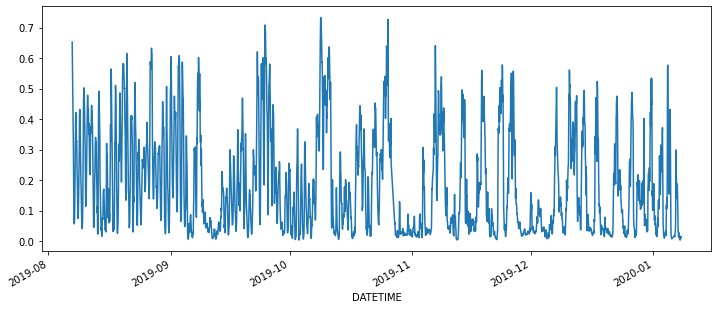

In [49]:
## data analysis
df_train = df_train.dropna()
df_train['CF'].plot(figsize=(12,5))
df_train.reset_index('DATETIME', inplace=True)
df_train.head()

## Feature Engineering: Identify significant variables

<AxesSubplot:>

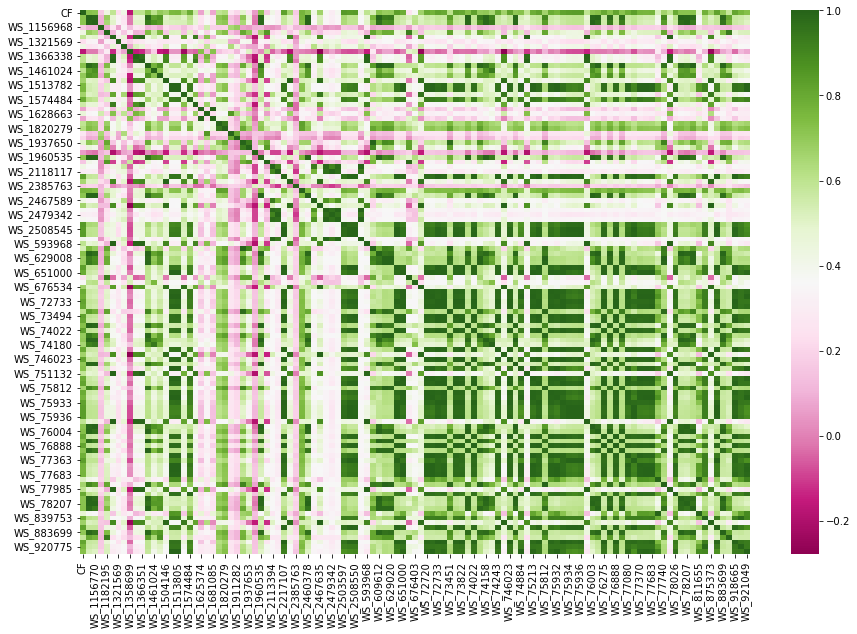

In [50]:
# Compute correlation between variables and target
# In this correlation map, light color means lower covariance of two variables.
# We can not manually decide which features are salent, it looks like most of the features are relavant. 
# As a result, some numeriacal feature selection algorithms can be adopted.

import seaborn as sns
data = df_train
data.corr(method='pearson')
plt.subplots(figsize=(15, 10))
sns.heatmap(data.corr(), cmap="PiYG")

### Naive Linear Regression Model without Feature Engineering

x.shape:(2908, 115), y.shape:(2908, 1),x_val.shape:(727, 115),y_val.shape:(727, 1)
Training accu: 0.9052502937599394
Test accu: 0.6812023209154884
validation data MAE from sklearn mae metrics: 0.063
validation data MAE: 0.063


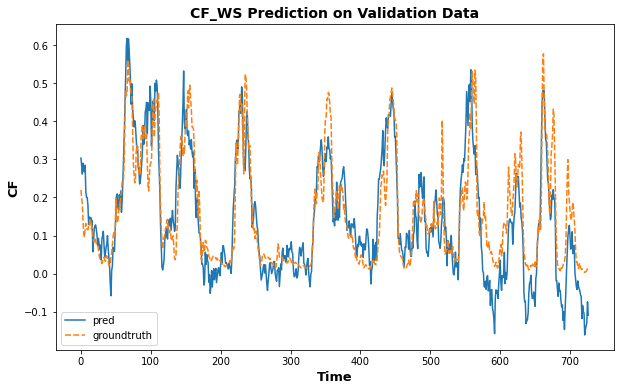

In [51]:
# extract hour, day, month feature
df_train['hour'] = df_train['DATETIME'].dt.hour
df_train['month'] = df_train['DATETIME'].dt.month
df_train['day'] = df_train['DATETIME'].dt.day

# split dataset
Y = df_train[['CF']]
# X = df_train.set_index('DATETIME')
X = df_train.drop(['DATETIME','CF'], axis=1)
# X = df_train.drop(['CF'], axis=1)
# x_train, x_val,y_train, y_val = X[:-92], X[-92:], Y[:-92], Y[-92:]
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.20, shuffle=False)
x, y, x_val,y_val = x_train.values, y_train.values, x_val.values, y_val.values

print(f'x.shape:{x.shape}, y.shape:{y.shape},x_val.shape:{x_val.shape},y_val.shape:{y_val.shape}')


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

mlr = LinearRegression()
sc_x = StandardScaler()

# scale and normalize training data
X_new = sc_x.fit_transform(x)

# model fitting
mlr.fit(X_new, y)

# prediction
X_val_new = sc_x.transform(x_val)
y_hat = mlr.predict(X_val_new)
print(f'Training accu: {mlr.score(X_new, y)}')
print(f'Test accu: {mlr.score(X_val_new, y_val)}')
mae = mean_absolute_error(y_val, y_hat)

#visualize predication 
results = np.concatenate((y_hat, y_val), axis=1)
df_res = pd.DataFrame(results, columns=["pred", "groundtruth"])           
## Set figure size
fig, ax = plt.subplots(figsize = (10,6))
# Plot the curve
sns.lineplot(data=df_res)
ax.set_title('CF_WS Prediction on Validation Data', fontdict={'fontsize':14, 'fontweight':'bold'})
# Set label for x-axis
ax.set_xlabel( "Time" , fontdict= { 'fontsize': 13, 'fontweight':'bold'})
# Set label for y-axis
ax.set_ylabel( "CF" , fontdict= { 'fontsize': 13, 'fontweight':'bold'})

# output MAE
print(f'validation data MAE from sklearn mae metrics: {np.mean(abs(y_hat - y_val)):.3f}')
print(f'validation data MAE: {mae:.3f}')

#### XGBoost Regressor provides  better results with MAE 0.047

[12:02:24] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
Training accu: 0.9995760945925963
Test accu: 0.7786383862651273
validation data MAE from sklearn mae metrics: 0.047
validation data MAE: 0.047


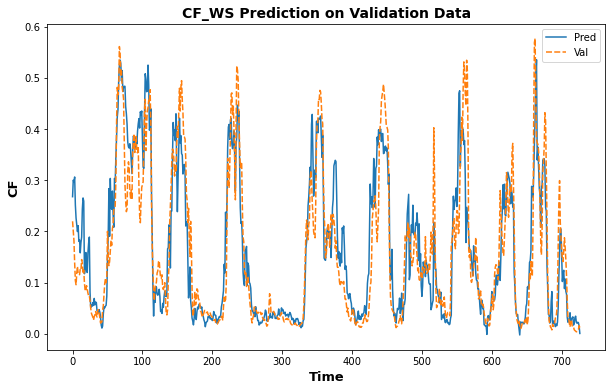

In [52]:
import xgboost as xgb

from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


## XGBoostRegressor

xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

## engineer new features to improve the results

sc_x = StandardScaler()

# scale and normalize training data
X_new = sc_x.fit_transform(x)

# model fitting
xgb_model.fit(X_new, y)

# prediction
X_val_new = sc_x.transform(x_val)
y_hat = xgb_model.predict(X_val_new)
y_hat = y_hat.reshape(y_hat.shape[0],-1)
print(f'Training accu: {xgb_model.score(X_new, y)}')
print(f'Test accu: {xgb_model.score(X_val_new, y_val)}')
mae = mean_absolute_error(y_val, y_hat)

#visualize predication 
results = np.concatenate((y_hat, y_val), axis=1)
df_res = pd.DataFrame(results, columns=["Pred", "Val"])           
## Set figure size
fig, ax = plt.subplots(figsize = (10,6))
# Plot the curve
sns.lineplot(data=df_res)
ax.set_title('CF_WS Prediction on Validation Data', fontdict={'fontsize':14, 'fontweight':'bold'})
# Set label for x-axis
ax.set_xlabel( "Time" , fontdict= { 'fontsize': 13, 'fontweight':'bold'})
# Set label for y-axis
ax.set_ylabel( "CF" , fontdict= { 'fontsize': 13, 'fontweight':'bold'})

# output MAE
print(f'validation data MAE from sklearn mae metrics: {np.mean(abs(y_hat - y_val)):.3f}')
print(f'validation data MAE: {mae:.3f}')

# steps = [
#     ('scalar', StandardScaler()),
#     ('poly', PolynomialFeatures(degree=2)),
#     ('model',xgb.XGBRegressor(objective="reg:linear", random_state=42))
# ]

# rf_pipeline = Pipeline(steps)
# y = y.reshape(y.shape[0])
# rf_pipeline.fit(x, y)
# print(f'Train : {rf_pipeline.score(x, y)}')
# print(f'Val: {rf_pipeline.score(x_val, y_val)}')

# # prediction

# y_hat = rf_pipeline.predict(x_val)
# mae = mean_absolute_error(y_val, y_hat)

# #visualize predication 
# fig, ax = plt.subplots()
# y_hat = y_hat.reshape(y_hat.shape[0],-1)
# print(y_hat.shape)
# print(y_val.shape)
# results = np.concatenate((y_hat, y_val), axis=1)
# df_res = pd.DataFrame(results, columns=["pred", "groundtruth"])           
# sns.lineplot(data=df_res)

# # output MAE
# print(f'validation data MAE from sklearn mae metrics: {np.mean(abs(y_hat - y_val)):.3f}')
# print(f'validation data MAE: {mae:.3f}')

## Since we are not using Time Series method, I add data shuffling and improved the results by around 0.02 for all linear regression methods.


### Naive Linear Regression Model without Feature Engineering(shuffle data before splitting)

Training accu: 0.8946364807805353
Test accu: 0.848632485745143
validation data MAE from sklearn mae metrics: 0.045
validation data MAE: 0.045


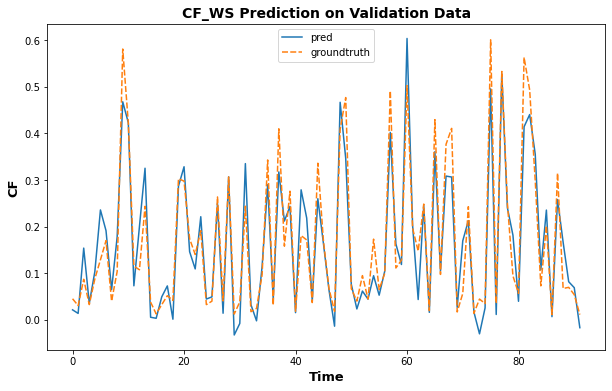

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# shuffle data samples
df_train = df_train.sample(frac = 1)

# split dataset
Y = df_train[['CF']]
X = df_train.drop(['DATETIME','CF'], axis=1)

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.20, shuffle=False)
x, y, x_val,y_val = x_train.values, y_train.values, x_val.values, y_val.values



mlr = LinearRegression()
sc_x = StandardScaler()

# scale and normalize training data
X_new = sc_x.fit_transform(x)

# model fitting
mlr.fit(X_new, y)

# prediction
X_val_new = sc_x.transform(x_val)
y_hat = mlr.predict(X_val_new)
print(f'Training accu: {mlr.score(X_new, y)}')
print(f'Test accu: {mlr.score(X_val_new, y_val)}')
mae = mean_absolute_error(y_val, y_hat)

#visualize predication 
results = np.concatenate((y_hat[-92:], y_val[-92:]), axis=1)
df_res = pd.DataFrame(results, columns=["pred", "groundtruth"])           
## Set figure size
fig, ax = plt.subplots(figsize = (10,6))
# Plot the curve
sns.lineplot(data=df_res)
ax.set_title('CF_WS Prediction on Validation Data', fontdict={'fontsize':14, 'fontweight':'bold'})
# Set label for x-axis
ax.set_xlabel( "Time" , fontdict= { 'fontsize': 13, 'fontweight':'bold'})
# Set label for y-axis
ax.set_ylabel( "CF" , fontdict= { 'fontsize': 13, 'fontweight':'bold'})

# output MAE
print(f'validation data MAE from sklearn mae metrics: {np.mean(abs(y_hat - y_val)):.3f}')
print(f'validation data MAE: {mae:.3f}')

### Engineer new features to improve the results
#### The above linear regression method sometimes are too simple so that can not fit complex functions.
#### Hence I introducced PolynomialFeatures to project data into high dimension space to better fit the curve.
#### In addition, I introduced L1/L2 regularization to further boost the results.
#### Naively adopting PolynomialFeatures leads to overfitting since 1) there's too many features here(115), it's very easy to get overfitting. 2) Polynomial Features in high dimensional space might also lead to overfitting. Hence I introducce L2 and L1 norm to supress overfitting.

#### PolynomialFeatures + L2 regularization improved the results by a large margin with MAE 0.029(shuffle data before splitting).

Training accu: 0.9793017555027841
Test accu: 0.9462842412820137
validation data MAE from sklearn mae metrics: 0.029
validation data MAE: 0.029


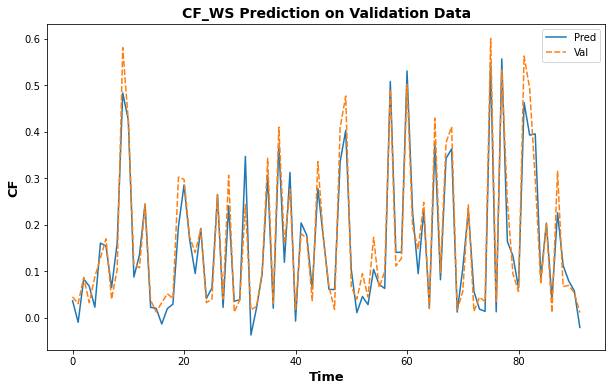

In [7]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

##  model define
# linear regression with L2 norm

## Engineer new features to improve the results


# note that degree=3 for PolynomialFeatures provides even better results(increased by 0.005) but it takes much longer time to run.

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=10, fit_intercept=True))
]

pipeline = Pipeline(steps)
pipeline.fit(x, y)
print(f'Training accu: {pipeline.score(x, y)}')
print(f'Test accu: {pipeline.score(x_val, y_val)}')

# prediction

y_hat = pipeline.predict(x_val)

mae = mean_absolute_error(y_val, y_hat)

#visualize predication 
results = np.concatenate((y_hat[-92:], y_val[-92:]), axis=1)
df_res = pd.DataFrame(results, columns=["Pred", "Val"])           
## Set figure size
fig, ax = plt.subplots(figsize = (10,6))
# Plot the curve
sns.lineplot(data=df_res)
ax.set_title('CF_WS Prediction on Validation Data', fontdict={'fontsize':14, 'fontweight':'bold'})
# Set label for x-axis
ax.set_xlabel( "Time" , fontdict= { 'fontsize': 13, 'fontweight':'bold'})
# Set label for y-axis
ax.set_ylabel( "CF" , fontdict= { 'fontsize': 13, 'fontweight':'bold'})

# output MAE
print(f'validation data MAE from sklearn mae metrics: {np.mean(abs(y_hat - y_val)):.3f}')
print(f'validation data MAE: {mae:.3f}')

#### PolynomialFeatures + L1 Regularization(shuffle data before splitting)

/Users/steven/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.963e-01, tolerance: 7.832e-03
  model = cd_fast.enet_coordinate_descent(


Training accu: 0.9811833281983778
Test accu: 0.9420389461093626
(727, 1)
(727, 1)
validation data MAE from sklearn mae metrics: 0.030
validation data MAE: 0.030


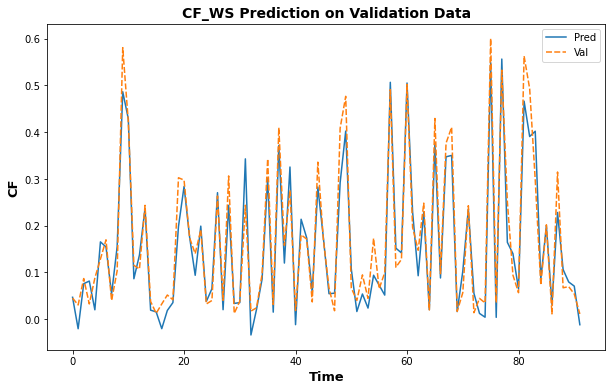

In [8]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# engineer new features to improve the results
# since 1) there's too many features here(112), it's very easy to get overfitting.
#  2) Polynomial Features in high dimensional space might also lead to overfitting.
# In additon, I tested L1 norm to supress overfitting, which gives us a sparse solution with less features being used.
# The result of this regularization.
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.00001,fit_intercept=True))
]

laso_pipeline = Pipeline(steps)
laso_pipeline.fit(x, y)
print(f'Training accu: {laso_pipeline.score(x, y)}')
print(f'Test accu: {laso_pipeline.score(x_val, y_val)}')

# prediction

y_hat = laso_pipeline.predict(x_val)
mae = mean_absolute_error(y_val, y_hat)

#visualize predication 
y_hat = y_hat.reshape(y_hat.shape[0],-1)
print(y_hat.shape)
print(y_val.shape)
results = np.concatenate((y_hat[-92:], y_val[-92:]), axis=1)
df_res = pd.DataFrame(results, columns=["Pred", "Val"])                 
## Set figure size
fig, ax = plt.subplots(figsize = (10,6))
# Plot the curve
sns.lineplot(data=df_res)
ax.set_title('CF_WS Prediction on Validation Data', fontdict={'fontsize':14, 'fontweight':'bold'})
# Set label for x-axis
ax.set_xlabel( "Time" , fontdict= { 'fontsize': 13, 'fontweight':'bold'})
# Set label for y-axis
ax.set_ylabel( "CF" , fontdict= { 'fontsize': 13, 'fontweight':'bold'})

# output MAE
print(f'validation data MAE from sklearn mae metrics: {np.mean(abs(y_hat - y_val)):.3f}')
print(f'validation data MAE: {mae:.3f}')

#### Random Forest Regressor is the ensemble of a number of trees(weak classifier)
#### The result(MAE:0.045) is comparable to Naive Linear Regression but not better than L2/L1 regualrization

Training accu: 0.8946364807805353
Test accu: 0.848632485745143
validation data MAE from sklearn mae metrics: 0.045
validation data MAE: 0.045


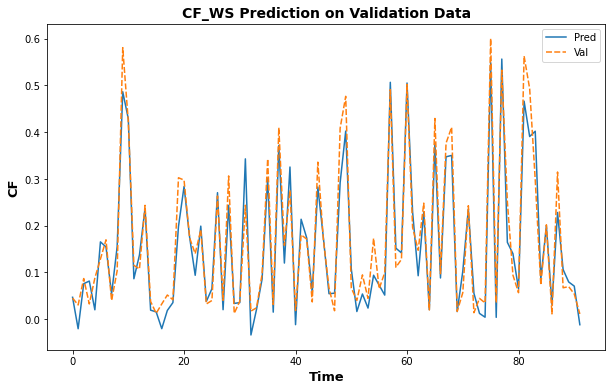

In [9]:
from sklearn import datasets, ensemble

from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


## gradientBoostingRegressor

params = {
    "max_depth": 4,
    "random_state": 0,
    
}

mlrf = ensemble.RandomForestRegressor(**params)
## engineer new features to improve the results

sc_x = StandardScaler()

# scale and normalize training data
X_new = sc_x.fit_transform(x)

# model fitting
mlr.fit(X_new, y)

# prediction
X_val_new = sc_x.transform(x_val)
y_hat = mlr.predict(X_val_new)
y_hat = y_hat.reshape(y_hat.shape[0],-1)
print(f'Training accu: {mlr.score(X_new, y)}')
print(f'Test accu: {mlr.score(X_val_new, y_val)}')
mae = mean_absolute_error(y_val, y_hat)

#visualize predication 
results = np.concatenate((y_hat[-92:], y_val[-92:]), axis=1)
## Set figure size
fig, ax = plt.subplots(figsize = (10,6))
# Plot the curve
sns.lineplot(data=df_res)
ax.set_title('CF_WS Prediction on Validation Data', fontdict={'fontsize':14, 'fontweight':'bold'})
# Set label for x-axis
ax.set_xlabel( "Time" , fontdict= { 'fontsize': 13, 'fontweight':'bold'})
# Set label for y-axis
ax.set_ylabel( "CF" , fontdict= { 'fontsize': 13, 'fontweight':'bold'})

# output MAE
print(f'validation data MAE from sklearn mae metrics: {np.mean(abs(y_hat - y_val)):.3f}')
print(f'validation data MAE: {mae:.3f}')

# steps = [
#     ('scalar', StandardScaler()),
#     ('poly', PolynomialFeatures(degree=2)),
#     ('model', ensemble.RandomForestRegressor(**params))
# ]

# rf_pipeline = Pipeline(steps)
# y = y.reshape(y.shape[0])
# rf_pipeline.fit(x, y)
# print(f'Train : {rf_pipeline.score(x, y)}')
# print(f'Val: {rf_pipeline.score(x_val, y_val)}')

# # prediction

# y_hat = rf_pipeline.predict(x_val)
# mae = mean_absolute_error(y_val, y_hat)

# #visualize predication 
# fig, ax = plt.subplots()
# y_hat = y_hat.reshape(y_hat.shape[0],-1)
# print(y_hat.shape)
# print(y_val.shape)
# results = np.concatenate((y_hat, y_val), axis=1)
# df_res = pd.DataFrame(results, columns=["pred", "groundtruth"])           
# sns.lineplot(data=df_res)

# # output MAE
# print(f'validation data MAE from sklearn mae metrics: {np.mean(abs(y_hat - y_val)):.3f}')
# print(f'validation data MAE: {mae:.3f}')

#### GradientBoosting Regression provides better results compared to naive linear regression but not better than Linear Regression+L2 regularization(shuffle data before splitting)

/Users/steven/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accu: 0.953870961803837
Test accu: 0.9289533749371349
validation data MAE from sklearn mae metrics: 0.032
validation data MAE: 0.032


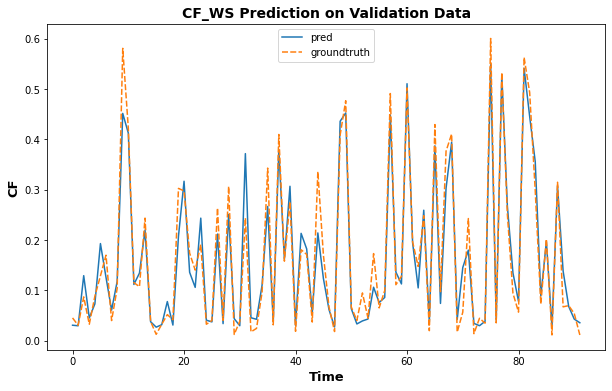

In [10]:
from sklearn import datasets, ensemble

from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


## gradientBoostingRegressor

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

mlr = ensemble.GradientBoostingRegressor(**params)
## engineer new features to improve the results

sc_x = StandardScaler()

# scale and normalize training data
X_new = sc_x.fit_transform(x)

# model fitting
mlr.fit(X_new, y)

# prediction
X_val_new = sc_x.transform(x_val)
y_hat = mlr.predict(X_val_new)
y_hat = y_hat.reshape(y_hat.shape[0],-1)
print(f'Training accu: {mlr.score(X_new, y)}')
print(f'Test accu: {mlr.score(X_val_new, y_val)}')
mae = mean_absolute_error(y_val, y_hat)

#visualize predication 
results = np.concatenate((y_hat[-92:], y_val[-92:]), axis=1)
df_res = pd.DataFrame(results, columns=["pred", "groundtruth"])           
## Set figure size
fig, ax = plt.subplots(figsize = (10,6))
# Plot the curve
sns.lineplot(data=df_res)
ax.set_title('CF_WS Prediction on Validation Data', fontdict={'fontsize':14, 'fontweight':'bold'})
# Set label for x-axis
ax.set_xlabel( "Time" , fontdict= { 'fontsize': 13, 'fontweight':'bold'})
# Set label for y-axis
ax.set_ylabel( "CF" , fontdict= { 'fontsize': 13, 'fontweight':'bold'})

# output MAE
print(f'validation data MAE from sklearn mae metrics: {np.mean(abs(y_hat - y_val)):.3f}')
print(f'validation data MAE: {mae:.3f}')


# steps = [
#     ('scalar', StandardScaler()),
#     ('poly', PolynomialFeatures(degree=2)),
#     ('model', ensemble.GradientBoostingRegressor(**params))
# ]

# xgboost_pipeline = Pipeline(steps)
# y = y.reshape(y.shape[0])
# xgboost_pipeline.fit(x, y)
# print(f'Training accu: {xgboost_pipeline.score(x, y)}')
# print(f'Test accu: {xgboost_pipeline.score(x_val, y_val)}')

# # prediction

# y_hat = xgboost_pipeline.predict(x_val)
# mae = mean_absolute_error(y_val, y_hat)

# #visualize predication 
# fig, ax = plt.subplots()
# y_hat = y_hat.reshape(y_hat.shape[0],-1)
# print(y_hat.shape)
# print(y_val.shape)
# results = np.concatenate((y_hat, y_val), axis=1)
# df_res = pd.DataFrame(results, columns=["pred", "groundtruth"])           
# sns.lineplot(data=df_res)

# # output MAE
# print(f'validation data MAE from sklearn mae metrics: {np.mean(abs(y_hat - y_val)):.3f}')
# print(f'validation data MAE: {mae:.3f}')

#### XGBoost Regressor with data shuffling provides the best results with MAE 0.026

[12:28:46] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
Training accu: 0.9995709940169526
Test accu: 0.9481840644384061
validation data MAE from sklearn mae metrics: 0.026
validation data MAE: 0.026


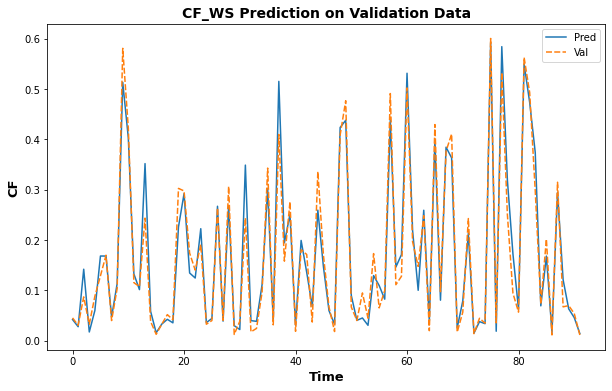

In [11]:
import xgboost as xgb

from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


## XGBoostRegressor

xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

## engineer new features to improve the results

sc_x = StandardScaler()

# scale and normalize training data
X_new = sc_x.fit_transform(x)

# model fitting
xgb_model.fit(X_new, y)

# prediction
X_val_new = sc_x.transform(x_val)
y_hat = xgb_model.predict(X_val_new)
y_hat = y_hat.reshape(y_hat.shape[0],-1)
print(f'Training accu: {xgb_model.score(X_new, y)}')
print(f'Test accu: {xgb_model.score(X_val_new, y_val)}')
mae = mean_absolute_error(y_val, y_hat)

#visualize predication 
results = np.concatenate((y_hat[-92:], y_val[-92:]), axis=1)
df_res = pd.DataFrame(results, columns=["Pred", "Val"])           
## Set figure size
fig, ax = plt.subplots(figsize = (10,6))
# Plot the curve
sns.lineplot(data=df_res)
ax.set_title('CF_WS Prediction on Validation Data', fontdict={'fontsize':14, 'fontweight':'bold'})
# Set label for x-axis
ax.set_xlabel( "Time" , fontdict= { 'fontsize': 13, 'fontweight':'bold'})
# Set label for y-axis
ax.set_ylabel( "CF" , fontdict= { 'fontsize': 13, 'fontweight':'bold'})

# output MAE
print(f'validation data MAE from sklearn mae metrics: {np.mean(abs(y_hat - y_val)):.3f}')
print(f'validation data MAE: {mae:.3f}')

## Test 

### Process Test Data

In [12]:
# extract hour, day, month feature
df_test.reset_index('DATETIME', inplace=True)
df_test['hour'] = df_test['DATETIME'].dt.hour
df_test['month'] = df_test['DATETIME'].dt.month
df_test['day'] = df_test['DATETIME'].dt.day


# X = df_train.set_index('DATETIME')
x_test = df_test.drop(['DATETIME','CF'], axis=1)

print(x_test.head())
x_test = x_test.values

   WS_1133733  WS_1156770  WS_1156968  WS_1182195  WS_1193865  WS_1321569  \
0        1.69        1.88        3.15        0.92        2.27        1.14   
1        1.60        2.02        3.91        0.44        2.36        1.15   
2        1.79        2.14        4.20        0.65        2.06        1.28   
3        2.01        2.32        5.17        0.51        2.31        0.83   
4        2.12        2.54        4.19        0.77        4.52        0.97   

   WS_1324653  WS_1358699  WS_1366338  WS_1366351  ...  WS_875373  WS_883683  \
0        1.24        2.98        2.53        2.18  ...       1.43       1.28   
1        1.63        2.83        2.84        2.20  ...       2.04       1.60   
2        2.36        3.07        2.34        1.94  ...       2.91       1.81   
3        3.39        3.38        2.53        2.26  ...       2.49       2.09   
4        2.89        3.79        4.21        4.46  ...       1.36       2.08   

   WS_883699  WS_914573  WS_918665  WS_920775  WS_921049

### Train a Model with all the data and Run Test

[12:29:41] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


Text(0, 0.5, 'CF')

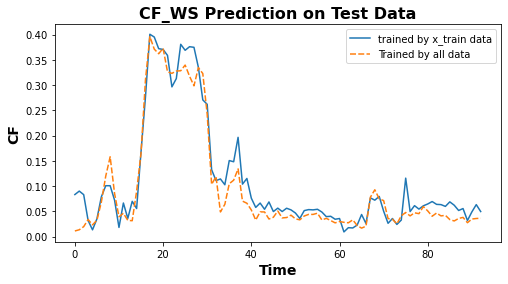

In [13]:
import xgboost as xgb

from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## All data samples
# split dataset
Y = df_train[['CF']]
X = df_train.drop(['DATETIME','CF'], axis=1)
x_all, y_all = X.values, Y.values

## XGBoostRegressor
xgb_model_all = xgb.XGBRegressor(objective="reg:linear", random_state=42)

## engineer new features to improve the results

sc_x_all = StandardScaler()

# scale and normalize training data
X_new_all = sc_x_all.fit_transform(x_all)

# model fitting
xgb_model_all.fit(X_new_all, y_all)

# prediction
X_val_new_all = sc_x_all.transform(x_test)
y_hat_all = xgb_model_all.predict(X_val_new_all)
y_hat_test_all = y_hat_all.reshape(y_hat_all.shape[0],-1)

# prediction
X_test_new = sc_x.transform(x_test)
y_hat_test = xgb_model.predict(X_test_new)
y_hat_test = y_hat_test.reshape(y_hat_test.shape[0],-1)

#visualize predication 
## Prepare dataframe
results = np.concatenate((y_hat_test, y_hat_test_all), axis=1)
df_res = pd.DataFrame(results, columns=["trained by x_train data", "Trained by all data"]) 
## Set figure size
fig, ax = plt.subplots(figsize = (8,4))
## Plot the curve
sns.lineplot(data=df_res)
ax.set_title('CF_WS Prediction on Test Data', fontdict={'fontsize':16, 'fontweight':'bold'})
## Set label for x-axis
ax.set_xlabel( "Time" , fontdict= { 'fontsize': 14, 'fontweight':'bold'})
## Set label for y-axis
ax.set_ylabel( "CF" , fontdict= { 'fontsize': 14, 'fontweight':'bold'})
# print(f'final prediction:{y_hat_test_all}')

In [14]:
print(f'final prediction:\n{y_hat_test_all}')

final prediction:
[[0.01118319]
 [0.01360354]
 [0.01976289]
 [0.03398265]
 [0.02333093]
 [0.03238746]
 [0.06812375]
 [0.11983749]
 [0.15797757]
 [0.08542921]
 [0.03926381]
 [0.04617029]
 [0.03215211]
 [0.03148091]
 [0.08992168]
 [0.16521522]
 [0.3098668 ]
 [0.3960559 ]
 [0.371119  ]
 [0.3619896 ]
 [0.37282702]
 [0.32624927]
 [0.32315147]
 [0.3277393 ]
 [0.32833713]
 [0.33960003]
 [0.3174226 ]
 [0.29852474]
 [0.33448067]
 [0.3228185 ]
 [0.24208765]
 [0.10331046]
 [0.11885667]
 [0.04884667]
 [0.06398661]
 [0.10468109]
 [0.11171347]
 [0.1340698 ]
 [0.07027994]
 [0.0660584 ]
 [0.05280492]
 [0.03272994]
 [0.04901242]
 [0.048842  ]
 [0.0348829 ]
 [0.03833416]
 [0.05060786]
 [0.03703418]
 [0.0377775 ]
 [0.04247643]
 [0.03514558]
 [0.03325025]
 [0.04082628]
 [0.04399868]
 [0.04395291]
 [0.0463678 ]
 [0.03296218]
 [0.03620892]
 [0.03181772]
 [0.027272  ]
 [0.02984689]
 [0.0283403 ]
 [0.02736788]
 [0.03319734]
 [0.02200002]
 [0.01679598]
 [0.02076318]
 [0.07809393]
 [0.0927543 ]
 [0.07489741]
 [